<a href="https://colab.research.google.com/github/SnehaTanwar006/K-means_Clustering/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# find_closest_centroids

def find_closest_centroids(X, centroids):

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        # Array to hold distance between X[i] and each centroids[j]
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j]) # Your code to calculate the norm between (X[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] = np.argmin(distance) # Your code here to calculate index of minimum value in distance

    return idx

In [ ]:
# Load an example dataset that we will be using
X = np.load("air25_knn.npy")

In [ ]:
print("First five elements of X are:\n", X[:5])
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [ ]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

First three elements in idx are: [0 2 1]


## Centroid means

In [ ]:
# Compute_centroids

def compute_centroids(X, idx, K):
    # Useful variables
    m, n = X.shape

    # You need to return the following variables correctly
    centroids = np.zeros((K, n))

    for k in range(K):
        points = X[idx == k] # Your code here to get a list of all data points in X assigned to centroid k
        centroids[k] = np.mean(points, axis = 0) # Your code here to compute the mean of the points assigned

    return centroids

In [ ]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are: \n", centroids)

The centroids are: 
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


## K-means - Visualization

In [ ]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

In [ ]:
def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    """
    Plots the progress of K-Means as it converges.
    """

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=idx, cmap='viridis', edgecolors='k', alpha=0.08)


    # Plot the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, linewidths=3)

    # Plot the lines from previous centroids to current centroids
    for j in range(K):
        plt.plot([previous_centroids[j, 0], centroids[j, 0]],
                 [previous_centroids[j, 1], centroids[j, 1]], 'k--', linewidth=1)

    plt.title(f'Iteration {i}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(True)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


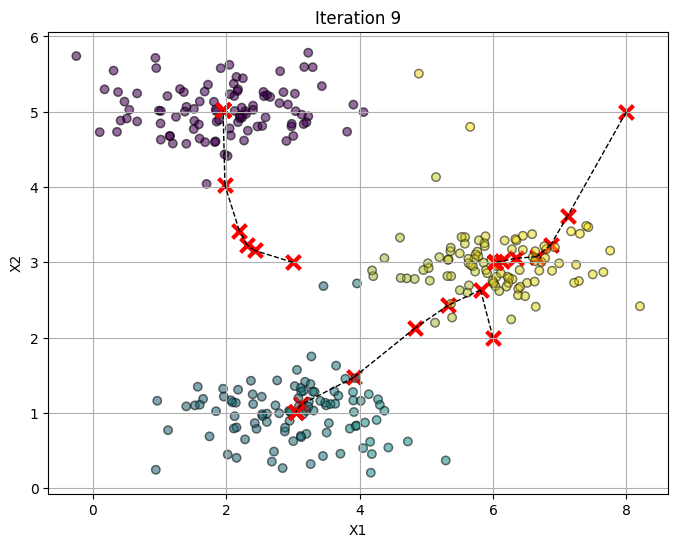

In [ ]:
# Load an example dataset
X = np.load("air25_knn.npy")

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

## Random initialization

In [ ]:
def kMeans_init_centroids(X, K):

    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


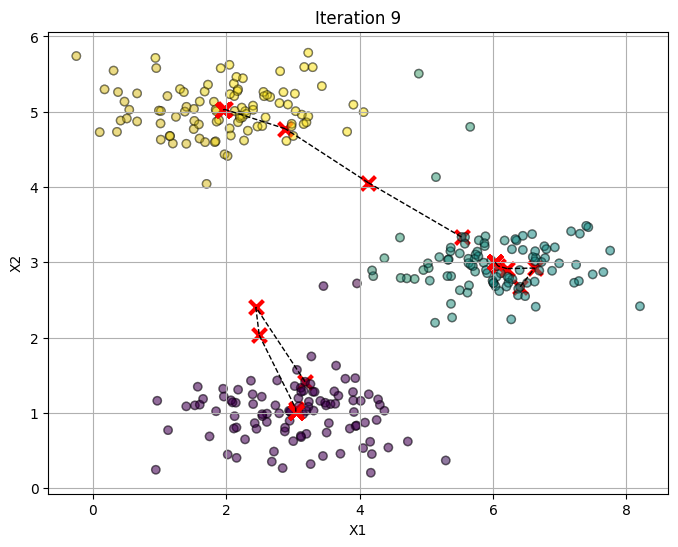

In [ ]:
# Run this cell repeatedly to see different outcomes.

# Set number of centroids and max number of iterations
K = 3
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

# SKLearn

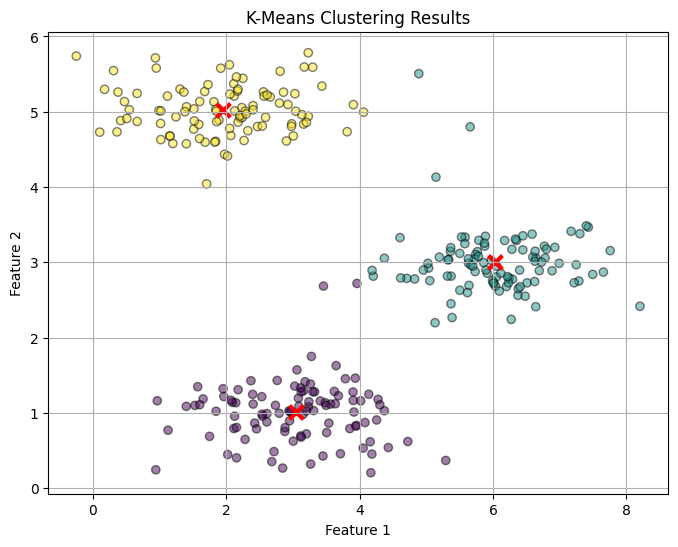

In [ ]:
# SKLearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# === 1. Load your data ===
data = np.load("air25_knn.npy")  # <-- replace with your actual .npy file
X = data # Features

# === 2. Apply K-Means clustering ===
# You can adjust the number of clusters (n_clusters) and other parameters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

# Get cluster assignments and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# === 3. Optional: Plot if 2D ===
if X.shape[1] == 2:
    plt.figure(figsize=(8,6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, linewidths=3)
    plt.title("K-Means Clustering Results")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()